In [156]:
from datetime import datetime, timedelta

import biosppy as bp
import matplotlib.pyplot as plt
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sb

from ltbio.biosignals import modalities, Event
from ltbio.biosignals.modalities import EDA, ACC
from ltbio.biosignals.sources.BitalinoShort import BitalinoShort
from ltbio.processing.filters import TimeDomainFilter, ConvolutionOperation
from ltbio.processing.filters import FrequencyResponse, FrequencyDomainFilter, BandType


In [184]:

path_ = 'D:\\PreEpiSeizures\\Patients_HSM\\Patient102\\Bitalino'
#options = {'date1': datetime(2021, 4, 15, 14, 45, 49),
#           'date2': datetime(2021, 4, 15, 14, 49, 32)}

options = {'date1': datetime(2019, 3, 14, 17, 49, 25),
           'date2': datetime(2019, 3, 14, 17, 51, 32)}

options = {'date1': datetime(2019, 3, 14, 22, 0, 19),
           'date2': datetime(2019, 3, 14, 22, 2, 19)}
#data = BitalinoShort._read(dir=path_, type=modalities.EDA, **options)
eda_ = EDA(path_, BitalinoShort, **options)
acc_ = ACC(path_, BitalinoShort, **options)
event1 = Event('crise 4', datetime(2019, 3, 14, 22, 1, 19))

In [130]:
# 10th-order low-pass finite impulse response filter, with a cut-off frequency of 0.0004Hz

filter_aux_freq = FrequencyDomainFilter(FrequencyResponse.FIR, BandType.LOWPASS, 2, 100)
filter_aux_freq_edr = FrequencyDomainFilter(FrequencyResponse.FIR, BandType.BANDPASS, (0.8,2), 100)
filter_aux_time = TimeDomainFilter(ConvolutionOperation.HANN, window_length=timedelta(seconds=5))
eda_ = EDA(path_, BitalinoShort, **options)
eda_scl_temp = EDA(path_, BitalinoShort, **options)
edr_scl_temp = EDA(path_, BitalinoShort, **options)
edr_scl_temp.filter(filter_aux_freq_edr)
eda_scl_temp.filter(filter_aux_time)
eda_.filter(filter_aux_freq)
eda_scl = eda_[:].to_array() - eda_scl_temp[:].to_array()


<Figure size 2160x360 with 0 Axes>

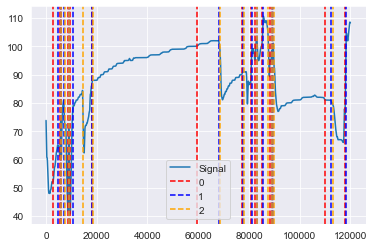

In [165]:
plt.figure(figsize=(30,5))
eda_signal = eda_[:].to_array()
signals, info = nk.eda_process(eda_signal, sampling_rate=1000.)
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

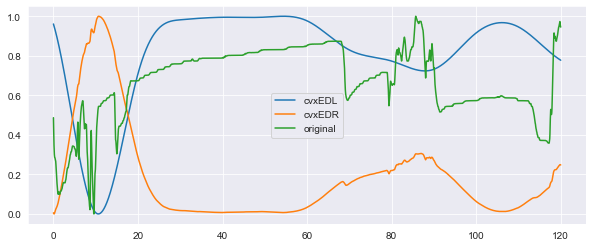

In [139]:
tm = np.arange(1., len(y)+1.) / Fs
#plt.plot(tm, r)
plt.figure(figsize=(10, 4))
plt.plot(tm, (cvxEDL - cvxEDL.min())/(cvxEDL.max() - cvxEDL.min()), label='cvxEDL')
#plt.plot(tm, (yn - yn.min())/(yn.max() - yn.min()), label='original')
plt.plot(tm, (cvxEDR - cvxEDR.min())/(cvxEDR.max() - cvxEDR.min()), label='cvxEDR')
plt.plot(tm, (eda_sig- np.min(eda_sig))/(np.max(eda_sig)-np.min(eda_sig)), label='original')

#plt.plot(tm, cvxEDL, label='cvxEDL')
#plt.plot(tm, cvxEDR, label='cvxEDR')
plt.legend()

In [234]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399', 'onset': '#843C0C', 'teal':'teal', }
legend_elements_ax1 = [Line2D([0], [0], color=colors['lightblue'], lw=3, label='EDA'),
                   Line2D([0], [0], color=colors['teal'], lw=3, label='SCL'),
                   #Line2D([0], [0], color=colors['teal'], lw=3, label='Z'),
                   Line2D([0], [0], color='grey', lw=3, label='preictal', linestyle='dashed'),
                   Line2D([0], [0], color='grey', lw=3, label='ictal'),
                   Line2D([0], [0], color=colors['onset'], lw=3, label='onset'),
                   ]

legend_elements_ax2 = [Line2D([0], [0], color=colors['lightblue'], lw=3, label='SCR'),
                   Line2D([0], [0], marker='o', label='SCR peaks', markerfacecolor=colors['lightorange'], markersize=15, color='w'),

                   #Line2D([0], [0], color=colors['teal'], lw=3, label='Z'),
                   Line2D([0], [0], color='grey', lw=3, label='preictal', linestyle='dashed'),
                   Line2D([0], [0], color='grey', lw=3, label='ictal'),
                   Line2D([0], [0], color=colors['onset'], lw=3, label='onset'),
                   ]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


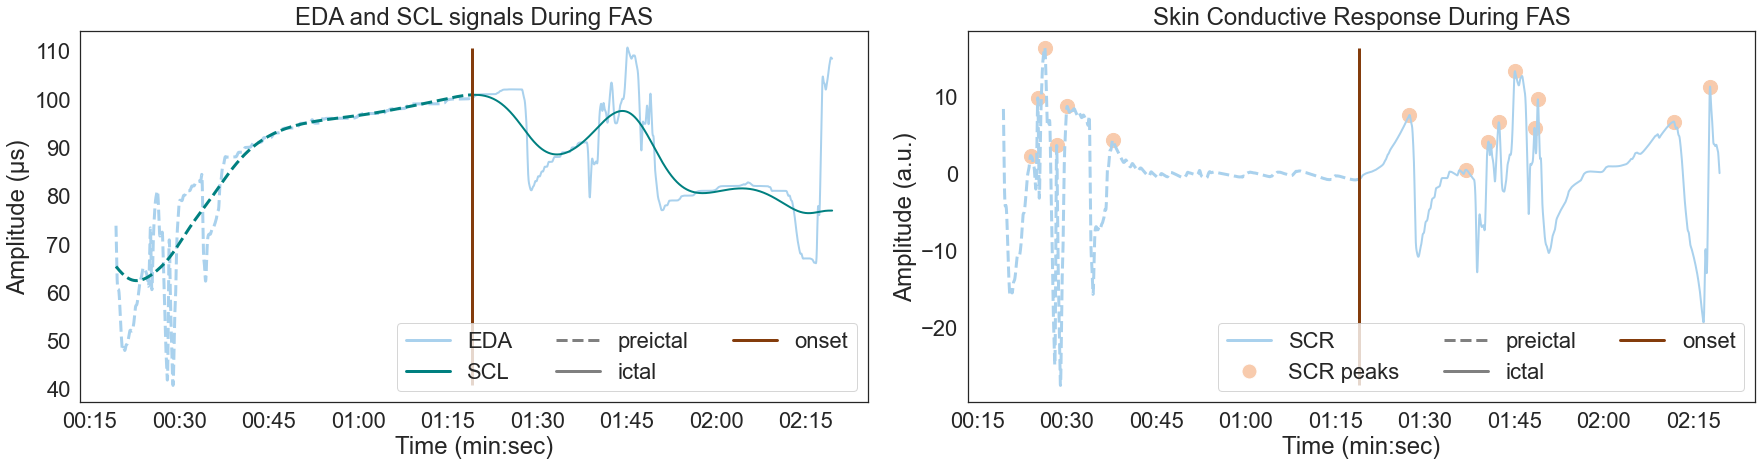

In [239]:
sb.set(font_scale=2)
sb.set_style(style='white')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))
colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399', 'onset': '#843C0C', 'teal':'teal', }
# plt.title('Respiratory Rate During Seizure')

ax1.set_ylabel('Amplitude (\u03BCs)')
ax2.set_xlabel('Time (min:sec)')
ax2.set_ylabel('Amplitude (a.u.)')
ax1.set_xlabel('Time (min:sec)')
ax1.set_title('EDA and SCL signals During FAS')
ax2.set_title('Skin Conductive Response During FAS')

x_axis = pd.date_range(eda_.initial_datetime, eda_.final_datetime, periods=len(eda_[:]))
ax1.plot(x_axis[x_axis <= event1.onset], signals['EDA_Clean'][:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=colors['lightblue'], linestyle='dashed')
ax1.plot(x_axis[x_axis <= event1.onset], signals['EDA_Tonic'][:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=colors['teal'], linestyle='dashed')
ax2.plot(x_axis[x_axis <= event1.onset], signals['EDA_Phasic'][:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=colors['lightblue'], linestyle='dashed')
# get peaks
onset_idx = len(x_axis[x_axis <= event1.onset])
peaks = info['SCR_Peaks'][info['SCR_Peaks']<=onset_idx]
ax2.scatter(x_axis[x_axis <= event1.onset][peaks], signals['EDA_Phasic'][peaks], s=200,
         color=colors['lightorange'], label='preictal', marker='o')

ax1.plot(x_axis[x_axis >= event1.onset], signals['EDA_Clean'][-len(x_axis[x_axis >= event1.onset]):], linewidth=2, color=colors['lightblue'], label='ictal')
ax1.plot(x_axis[x_axis >= event1.onset], signals['EDA_Tonic'][-len(x_axis[x_axis >= event1.onset]):], linewidth=2, color=colors['teal'], label='ictal')
ax2.plot(x_axis[x_axis >= event1.onset], signals['EDA_Phasic'][-len(x_axis[x_axis >= event1.onset]):], linewidth=2, color=colors['lightblue'], label='SCR')
peaks = info['SCR_Peaks'][info['SCR_Peaks']>onset_idx]
ax2.scatter(x_axis[x_axis >= event1.onset][peaks-onset_idx], signals['EDA_Phasic'][peaks],
         color=colors['lightorange'], label='ictal', marker='o', s=200)

from matplotlib.dates import DateFormatter
ax1.vlines(event1.onset, np.max(signals['EDA_Clean']), np.min(signals['EDA_Clean']), color= colors['onset'], label='Seizure Onset', linewidth=3)
ax2.vlines(event1.onset, np.max(signals['EDA_Phasic']), np.min(signals['EDA_Phasic']), color= colors['onset'], label='Seizure Onset', linewidth=3)

ax1.xaxis.set_major_formatter(DateFormatter('%M:%S'))
ax2.xaxis.set_major_formatter(DateFormatter('%M:%S'))


ax1.legend(handles=legend_elements_ax1, loc='lower right', ncol=3)

ax2.legend(handles=legend_elements_ax2, loc='lower right', ncol=3)
plt.tight_layout()
figname = 'C:\\Users\\Mariana\\Documents\\Epilepsy\\images\\eda_during_seizure'
plt.savefig(figname + '.png')
plt.savefig(figname + '.eps', format='eps')
plt.show()
